<a href="https://colab.research.google.com/github/rohinishimpatwar/The-NLP-News-Sentiment-Trading-Strategy/blob/master/EDA/Part2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial News Sentiment Analysis - Part2 - EDA

__Requirements__:<br>
*Packages*:
    - pandas
    - ensp numpy
    - datetime
    - nltk 
    - matplotlib
    - collections
    - wordcloud
*Documents*:
    - './dataset/raw_news_with_ic.csv’
    - './dataset/clean_labeled_data.csv'

In [0]:
import pandas as pd 
import numpy as np

In [0]:
# read in labeled csv data
news_df = pd.read_csv('dataset/raw_news_with_ic_40k.csv', usecols = ['Unnamed: 0','title','text','Company','Industry','published'])
news_df.rename({'Unnamed: 0':'news_id'}, axis='columns', inplace=True)
news_df.head()

,news_id,published,title,text,Company,Industry
0,0,2018-01-23T21:31:00.000+02:00,Hedge fund industry's stars are stumbling as s...,14 Mins Ago | 02:03 \nIt's not easy being famo...,"['General Electric', 'General Motors', '']","['Industrials', 'Consumer Discretionary']"
1,6,2018-01-12T17:53:00.000+02:00,Trump sabotaged his triumphant week,This should have been a triumphant week for Pr...,"['Walmart', '']",['Consumer Staples']
2,12,2018-01-29T01:54:00.000+02:00,Trump national security team sees building 5G ...,"January 28, 2018 / 11:55 PM / in 2 hours Trump...","['AT&T', 'Dish Network', 'T-Mobile US', '']","['Communication Services', 'Communication Serv..."
3,15,2018-01-25T14:41:00.000+02:00,American Airlines fourth-quarter earnings top ...,American Airlines on Thursday posted better-th...,"['Southwest Airlines', '']",['Industrials']
4,20,2018-01-12T14:30:00.000+02:00,BlackRock CEO Larry Fink: GOP tax law will do ...,BlackRock chief Larry Fink told CNBC on Friday...,"['BlackRock', '']",['Financials']


In [0]:
news_df.shape

(39948, 6)

### 1 Number News Published  v.s. Date

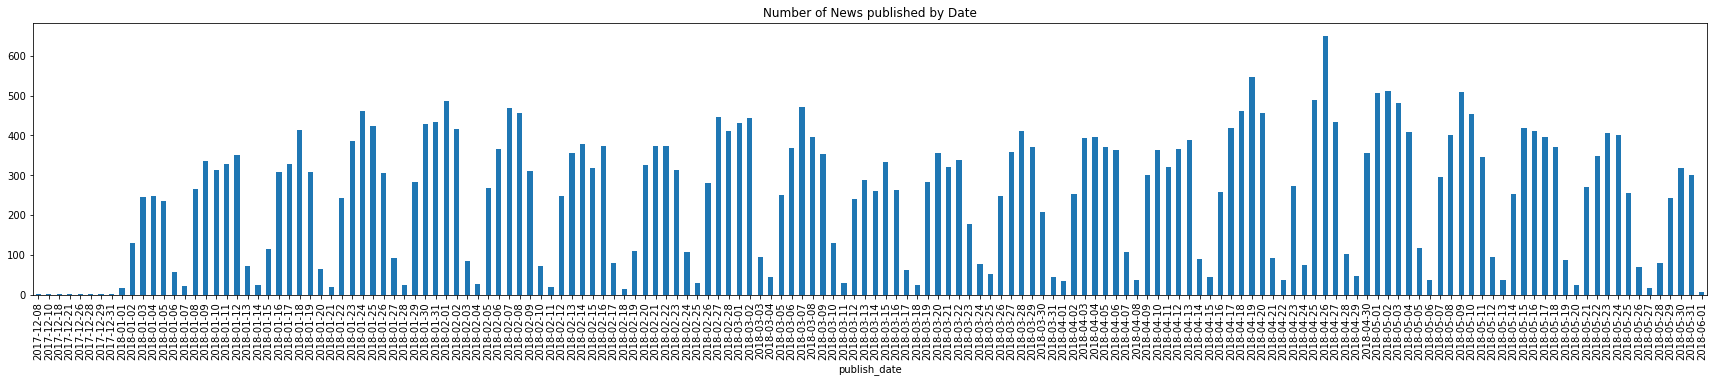

In [0]:
news_df['publish_date'] = news_df.published.apply(lambda x:x[:10])
news_df = news_df.sort_values(by='publish_date', ascending=True)
news_df.groupby('publish_date')['title'].count().plot(kind='bar', figsize=(30,5), title = 'Number of News published by Date')

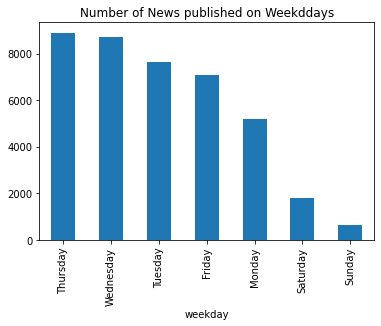

In [0]:
from datetime import datetime
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
news_df['weekday'] = news_df.publish_date.apply(lambda x: weekDays[datetime.strptime(x, '%Y-%m-%d').weekday()])
news_df.groupby('weekday')['title'].count().sort_values(ascending=False).plot(kind='bar', title='Number of News published on Weekddays')

To do Analysis: 

### 2 Word Counts

In [0]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/i509324/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
news_df['text_nwords'] = news_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
news_df.sort_values(by='text_nwords', inplace=True)
news_df.head()

,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords
19913,149284,2018-03-15T20:16:00.000+02:00,Walmart drops on whistleblower lawsuit,Walmart drops on whistleblower lawsuit 1 Hour Ago,"['Walmart', '']",['Consumer Staples'],2018-03-15,Thursday,8
6911,47507,2018-01-10T17:02:00.000+02:00,Berkshire Hathaway updates succession plan,Berkshire Hathaway updates succession plan 31 ...,"['Berkshire Hathaway', '']",['Financials'],2018-01-10,Wednesday,8
13248,97643,2018-04-19T21:27:00.000+03:00,Lam Research CEO on earnings,Lam Research CEO on earnings 2 Hours Ago,"['Lam Research', '']",['Information Technology'],2018-04-19,Thursday,8
15399,114135,2018-04-12T20:42:00.000+03:00,Nordstrom store for men opened Thursday,Nordstrom store for men opened Thursday 1 Hour...,"['Nordstrom', '']",['Consumer Discretionary'],2018-04-12,Thursday,9
4508,28396,2018-01-11T21:58:00.000+02:00,Capital One Financial raises minimum wage,Capital One Financial raises minimum wage 1 Ho...,"['Capital One Financial', '']",['Financials'],2018-01-11,Thursday,9


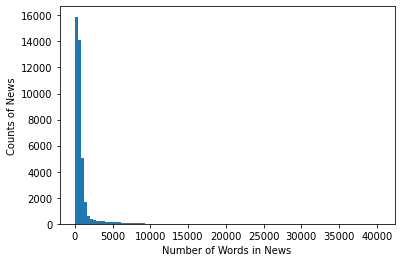

In [0]:
import matplotlib.pyplot as plt
plt.hist(news_df.text_nwords, bins=100)
plt.xlabel('Number of Words in News')
plt.ylabel('Counts of News')
plt.show()

In [0]:
print(f'The longest news has {max(news_df.text_nwords)} words.')
news_df.loc[news_df['text_nwords']==max(news_df.text_nwords)]

The longest news has 40325 words.


,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords
31379,243685,2018-02-15T02:24:00.000+02:00,Agnico Eagle Reports Fourth Quarter and Full Y...,Stock Symbol: AEM (NYSE and TSX)\n(All amounts...,"['E*Trade', '']",['Financials'],2018-02-15,Thursday,40325


In [0]:
print(f'The shortest news has {min(news_df.text_nwords)} words.')
news_df.loc[news_df['text_nwords']==min(news_df.text_nwords)]

The shortest news has 8 words.


,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords
19913,149284,2018-03-15T20:16:00.000+02:00,Walmart drops on whistleblower lawsuit,Walmart drops on whistleblower lawsuit 1 Hour Ago,"['Walmart', '']",['Consumer Staples'],2018-03-15,Thursday,8
6911,47507,2018-01-10T17:02:00.000+02:00,Berkshire Hathaway updates succession plan,Berkshire Hathaway updates succession plan 31 ...,"['Berkshire Hathaway', '']",['Financials'],2018-01-10,Wednesday,8
13248,97643,2018-04-19T21:27:00.000+03:00,Lam Research CEO on earnings,Lam Research CEO on earnings 2 Hours Ago,"['Lam Research', '']",['Information Technology'],2018-04-19,Thursday,8


As the range of counts are pretty large, we take log on x axis and see the distribution:

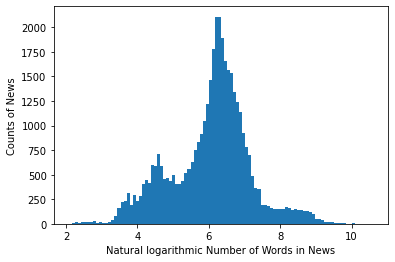

In [0]:
log_nwords = np.log(news_df['text_nwords'])
plt.hist(log_nwords, bins=100)
plt.xlabel('Natural logarithmic Number of Words in News')
plt.ylabel('Counts of News')
plt.show()

The number of words in news texts is close to log-normal distribution.

### 3.1 Company and Industry Mentioned Most in News

In [0]:
news_df['Company'] = news_df.Company.apply(lambda x: x.replace('[', '').replace(']','').replace("'",'').split(', '))
news_df['Industry'] = news_df.Industry.apply(lambda x: x.replace('[', '').replace(']','').replace("'",'').split(', '))
news_df.head()

,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords
19913,149284,2018-03-15T20:16:00.000+02:00,Walmart drops on whistleblower lawsuit,Walmart drops on whistleblower lawsuit 1 Hour Ago,"[Walmart, ]",[Consumer Staples],2018-03-15,Thursday,8
6911,47507,2018-01-10T17:02:00.000+02:00,Berkshire Hathaway updates succession plan,Berkshire Hathaway updates succession plan 31 ...,"[Berkshire Hathaway, ]",[Financials],2018-01-10,Wednesday,8
13248,97643,2018-04-19T21:27:00.000+03:00,Lam Research CEO on earnings,Lam Research CEO on earnings 2 Hours Ago,"[Lam Research, ]",[Information Technology],2018-04-19,Thursday,8
15399,114135,2018-04-12T20:42:00.000+03:00,Nordstrom store for men opened Thursday,Nordstrom store for men opened Thursday 1 Hour...,"[Nordstrom, ]",[Consumer Discretionary],2018-04-12,Thursday,9
4508,28396,2018-01-11T21:58:00.000+02:00,Capital One Financial raises minimum wage,Capital One Financial raises minimum wage 1 Ho...,"[Capital One Financial, ]",[Financials],2018-01-11,Thursday,9


456 companies are mentioned in news, top 20 are:
E*Trade 10125
Morgan Stanley 2627
Wells Fargo 1932
Walmart 1874
General Motors 1523
AT&T 1483
Amazon.com Inc. 1482
Apple Inc. 1407
General Electric 1161
Berkshire Hathaway 1013
BlackRock 714
Johnson & Johnson 652
Microsoft Corp. 598
JPMorgan Chase & Co. 543
Nike 529
Procter & Gamble 468
Intel Corp. 455
Goldman Sachs Group 421
Xerox 401
PayPal 387


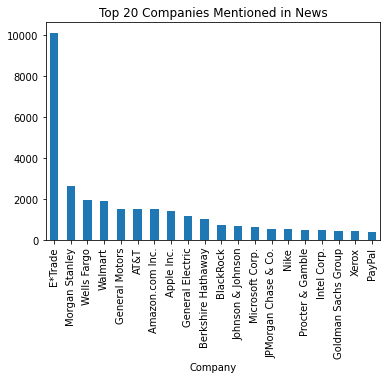

In [0]:
from collections import Counter

company_list = [c for sublist in news_df.Company.tolist() for c in sublist if c!='']
company_counter = Counter(company_list).most_common()[:20]
print(f'{len(set(company_list))} companies are mentioned in news, top 20 are:')
for p in company_counter:
    c,f = p
    print(c,f)
df = pd.DataFrame(data=company_counter, columns=['Company','count'])
df.groupby('Company').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 Companies Mentioned in News')

11 industries are mentioned in news: 
Financials 20194
Consumer Discretionary 6680
Information Technology 6232
Consumer Staples 4250
Industrials 4209
Health Care 4192
Communication Services 3474
Energy 2104
Utilities 1030
Materials 707
Real Estate 643


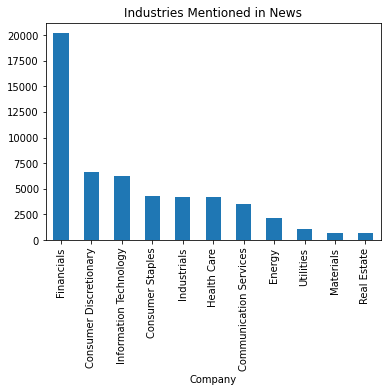

In [0]:
industry_list = [c for sublist in news_df.Industry.tolist() for c in sublist if c!='']
industry_counter = Counter(industry_list).most_common()
print(f'{len(industry_counter)} industries are mentioned in news: ')
for p in industry_counter:
    c,f = p
    print(c,f)
df = pd.DataFrame(data=industry_counter, columns=['Company','count'])
df.groupby('Company').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Industries Mentioned in News')

Seems that the __*Financials*__ companies are must more oftenly mentioned than companies in other indusries. This is likely because of the __*noise*__ in the news - often times a financial company like ETrade or Morgan Stantely appear in a piece of news because they are providing some analysis/opinions on some other matters like the macroeconomy. Hence the piece of news is actually about something else intead of the comany. We therefore look at the top industries and companies __*exluding the financial companies*__. 

### 3.2 Top companies and industries excluding the financial industry

456 companies are mentioned in news, top 20 are:
Walmart 1874
General Motors 1523
AT&T 1483
Amazon.com Inc. 1482
Apple Inc. 1407
General Electric 1161
Johnson & Johnson 652
Microsoft Corp. 598
Nike 529
Procter & Gamble 468
Intel Corp. 455
Xerox 401
PayPal 387
Comcast Corp. 385
Netflix Inc. 365
Broadridge Financial Solutions 363
Home Depot 360
Southwest Airlines 339
CVS Health 333
Exxon Mobil Corp. 314


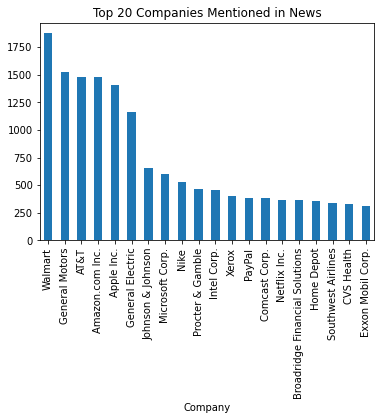

In [0]:
comp_industry = pd.read_csv('dataset/sp500companies_industry.csv')
comp_industry = comp_industry[[ 'Security', 'GICS Sector']]

names = np.array(comp_industry.Security)
sector = np.array(comp_industry['GICS Sector'])

fin_comp_list = []
index_list = []
for i in range(len(sector)):
    if sector[i] == 'Financials':
        index_list.append(i)

fin_comp_list = set(names[index_list])

company_list = [c for sublist in news_df.Company.tolist() for c in sublist if c!='']

company_list_exclude_fin = [c for c in company_list if not c in fin_comp_list]
company_counter = Counter(company_list_exclude_fin).most_common()[:20]
print(f'{len(set(company_list))} companies are mentioned in news, top 20 are:')
for p in company_counter:
    c,f = p
    print(c,f)
df = pd.DataFrame(data=company_counter, columns=['Company','count'])
df.groupby('Company').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 Companies Mentioned in News')

10 industries are mentioned in news: 
Consumer Discretionary 6680
Information Technology 6232
Consumer Staples 4250
Industrials 4209
Health Care 4192
Communication Services 3474
Energy 2104
Utilities 1030
Materials 707
Real Estate 643


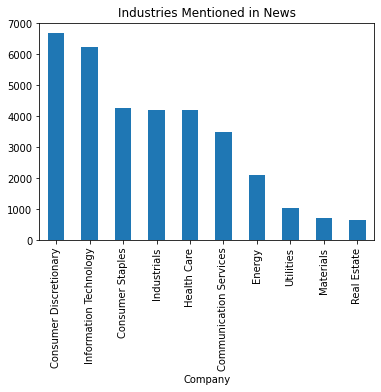

In [0]:
industry_list = [c for sublist in news_df['Industry'].tolist() for c in sublist if c!='']
industry_list_exclude_fin = [c for c in industry_list if c != 'Financials']
industry_counter = Counter(industry_list_exclude_fin).most_common()
print(f'{len(industry_counter)} industries are mentioned in news: ')
for p in industry_counter:
    c,f = p
    print(c,f)
df = pd.DataFrame(data=industry_counter, columns=['Company','count'])
df.groupby('Company').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Industries Mentioned in News')

#### Pre - processing : Remove stopwords (some of the stopwords include specially charactors, so I first remove stopwords before removing digital numbers and special characters

In [0]:
import re
import string

def clean_text(text):
    text_word =re.sub('\W+', ' ', text)
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text_word)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

news_df['text_cleaned'] = news_df['text'].apply(lambda x: clean_text(x))
news_df.head()

,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords,text_cleaned
19913,149284,2018-03-15T20:16:00.000+02:00,Walmart drops on whistleblower lawsuit,Walmart drops on whistleblower lawsuit 1 Hour Ago,"[Walmart, ]",[Consumer Staples],2018-03-15,Thursday,8,walmart drops on whistleblower lawsuit hour ago
6911,47507,2018-01-10T17:02:00.000+02:00,Berkshire Hathaway updates succession plan,Berkshire Hathaway updates succession plan 31 ...,"[Berkshire Hathaway, ]",[Financials],2018-01-10,Wednesday,8,berkshire hathaway updates succession plan min...
13248,97643,2018-04-19T21:27:00.000+03:00,Lam Research CEO on earnings,Lam Research CEO on earnings 2 Hours Ago,"[Lam Research, ]",[Information Technology],2018-04-19,Thursday,8,lam research ceo on earnings hours ago
15399,114135,2018-04-12T20:42:00.000+03:00,Nordstrom store for men opened Thursday,Nordstrom store for men opened Thursday 1 Hour...,"[Nordstrom, ]",[Consumer Discretionary],2018-04-12,Thursday,9,nordstrom store for men opened thursday hour ago
4508,28396,2018-01-11T21:58:00.000+02:00,Capital One Financial raises minimum wage,Capital One Financial raises minimum wage 1 Ho...,"[Capital One Financial, ]",[Financials],2018-01-11,Thursday,9,capital one financial raises minimum wage hour...


In [0]:
# stopword list

f = open('dataset/StopWords_GenericLong.txt', 'r')
wordlist1 = f.read()
wordlist1 = wordlist1.lower().split()
f.close()

f = open('dataset/StopWords_DatesandNumbers.txt', 'r')
wordlist2 = f.read()
wordlist2 = wordlist2.lower().split()
f.close()

with open('dataset/StopWords_Geographic.txt', 'r') as f: 
    wordlist3 = f.read()
    wordlist3 = wordlist3.lower().split()
    
f = open('dataset/StopWords_Names.txt', 'r')
wordlist4 = f.read()
wordlist4 = wordlist4.lower().split()
f.close()


additional_stop_words = ['months', 'years', 'www', 'http', 'prnewswire', 'businesswire', 'https', 'en']

stop_word_list = wordlist1 + wordlist2 + wordlist3 + wordlist4 + additional_stop_words
stop_word_list = [word.strip() for word in stop_word_list]
stop_word_set = set(stop_word_list)

In [0]:
def remove_noise_words(text, words_to_remove):
    text_list = text.split(" ")
    good_list = [w.strip() for w in text_list if not w.strip() in words_to_remove]
    return ' '.join(good_list)

news_df['text_no_stopwords'] = news_df['text_cleaned'].apply(lambda x : remove_noise_words(x, stop_word_set))
news_df['text_nsw_nwords'] = news_df['text_no_stopwords'].apply(lambda x: len(nltk.word_tokenize(x)))
news_df.sort_values(by='text_nsw_nwords', inplace=True)
news_df.head()

,news_id,published,title,text,Company,Industry,publish_date,weekday,text_nwords,text_cleaned,text_no_stopwords
19913,149284,2018-03-15T20:16:00.000+02:00,Walmart drops on whistleblower lawsuit,Walmart drops on whistleblower lawsuit 1 Hour Ago,"[Walmart, ]",[Consumer Staples],2018-03-15,Thursday,8,walmart drops on whistleblower lawsuit hour ago,walmart drops whistleblower lawsuit hour ago
6911,47507,2018-01-10T17:02:00.000+02:00,Berkshire Hathaway updates succession plan,Berkshire Hathaway updates succession plan 31 ...,"[Berkshire Hathaway, ]",[Financials],2018-01-10,Wednesday,8,berkshire hathaway updates succession plan min...,berkshire updates succession plan mins ago
13248,97643,2018-04-19T21:27:00.000+03:00,Lam Research CEO on earnings,Lam Research CEO on earnings 2 Hours Ago,"[Lam Research, ]",[Information Technology],2018-04-19,Thursday,8,lam research ceo on earnings hours ago,research ceo earnings hours ago
15399,114135,2018-04-12T20:42:00.000+03:00,Nordstrom store for men opened Thursday,Nordstrom store for men opened Thursday 1 Hour...,"[Nordstrom, ]",[Consumer Discretionary],2018-04-12,Thursday,9,nordstrom store for men opened thursday hour ago,store men opened hour ago
4508,28396,2018-01-11T21:58:00.000+02:00,Capital One Financial raises minimum wage,Capital One Financial raises minimum wage 1 Ho...,"[Capital One Financial, ]",[Financials],2018-01-11,Thursday,9,capital one financial raises minimum wage hour...,capital financial raises minimum wage hour ago


In [0]:
# save a datasets for sentiment model training
news_df_text = news_df[['news_id', 'text_no_stopwords']]
news_df_text.to_csv('./dataset/cleaned_text_withid_40k.csv')

# get unlabeled news 
labeled_data = pd.read_csv('dataset/clean_labeled_news_withid.csv', index_col=[0])
news_df_text = news_df_text.loc[~news_df_text.news_id.isin(labeled_data.news_id)]
news_df_text.to_csv('./dataset/clean_unlabel_news_withid.csv', index=False)

In [0]:
# cut news text to certain token length
# def cut_first_n_words(text_nword, n=128):
#     if int(text_nword[1]) > n:
#         word_list = nltk.word_tokenize(text_nword[0])
#         re_text = word_list[:n]
#         return ' '.join(re_text)
#     else:
#         return text_nword[0]
# max(news_df_text['text_128'].apply(lambda x: len(nltk.word_tokenize(x))))
# news_df_text['text_128'] = news_df_text[['text_no_stopwords', 'text_nsw_nwords']].apply(cut_first_n_words, axis=1)
# news_df_text

In [0]:
# from nltk.stem import WordNetLemmatizer

# def lemmatizewords(text):
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = []
#     text_list = text.split(' ')
#     lemmatized += [lemmatizer.lemmatize(each) for each in text_list]
#     return ' '.join(lemmatized)

# news_df['text_lemmatized'] = news_df['text_stemmed'].apply(lambda x: lemmatizewords(x))
# news_df.head()

In [0]:
# from nltk.stem import PorterStemmer

# def stemwords(text):
#     stemmer = PorterStemmer()
#     stemmed = []
#     text_list = text.split(' ')
#     stemmed += [stemmer.stem(each) for each in text_list]
#     return ' '.join(stemmed)

# news_df['text_stemmed'] = news_df['text_no_stopwords'].apply(lambda x: stemwords(x))
# news_df.head()

### 4 Top N-gram Anlysis

#### 4.1 Top Words  by Industry

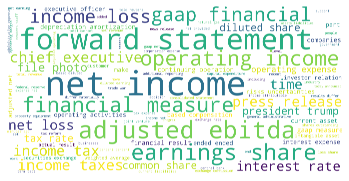

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
word_cloud_text = ''.join(news_df.text_no_stopwords)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color='white',\
                     scale=10, width=1000, height=500).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
def print_top_bottom_words(token_list, n):
    words_counter = Counter(token_list)
    print(f'Top {n} words in news:')
    print(words_counter.most_common()[:n])
    print()

    print(f'Bottom {n} words in news:')
    print(words_counter.most_common()[-n:])
    print()

In [0]:
word_tokens = nltk.word_tokenize(''.join(news_df['text_no_stopwords']))
print_top_bottom_words(word_tokens, 25)

Top 25 words in news:
[('company', 119168), ('net', 98730), ('percent', 84229), ('income', 83837), ('share', 60110), ('financial', 59031), ('operating', 52631), ('tax', 49803), ('gaap', 49437), ('business', 47614), ('market', 43373), ('total', 42841), ('adjusted', 42069), ('earnings', 41539), ('reuters', 41031), ('results', 39738), ('revenue', 37452), ('trade', 37344), ('ended', 37003), ('including', 36346), ('statements', 36237), ('shares', 36150), ('loss', 35899), ('assets', 33523), ('costs', 32240)]

Bottom 25 words in news:
[('infilled', 1), ('kkj', 1), ('norra', 1), ('arsenopyrite', 1), ('risberget', 1), ('deformation', 1), ('flexures', 1), ('thicknesses', 1), ('chipriona', 1), ('subvertical', 1), ('breccia', 1), ('subhorizontal', 1), ('dacite', 1), ('drillhole', 1), ('cayden', 1), ('guachinango', 1), ('bolas', 1), ('zapoteca', 1), ('simcoe', 1), ('kitilla', 1), ('resou', 1), ('legault', 1), ('aggregrate', 1), ('subcategories', 1), ('kylmakangas', 1)]



In [0]:
from nltk.util import ngrams
def top_k_ngrams(text, n=1, k=1):
    token_list = nltk.word_tokenize(text)
    ngrams_list = list(ngrams(token_list, n))
    gram_counter = Counter(ngrams_list)
    return gram_counter.most_common()[:k]

def top_k_ngrams_industry(industry, n=1, k=20):
    if industry == 'all':
        sub_df = news_df
    else:
        sub_df = news_df.loc[news_df['Industry'].apply(lambda x: True if industry in x else False)]
    text = ''.join(sub_df.text_no_stopwords)
    common_words = top_k_ngrams(text, n, k)
    df = pd.DataFrame(common_words, columns=['Word','count'])
    df['Word'] = df.Word.apply(lambda x:' '.join(x))
    
    if n==1:
        gram_name = 'Words'
    elif n==2:
        gram_name = 'Bigrams'
    elif n==3:
        gram_name = 'Trigrams'
    elif n==4:
        gram_name = 'Quatgrams'
    else:
        gram_name = f'{n}grams'
    
    print(f'top {gram_name} in {industry} industry')
    print(df)
    df.groupby('Word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title=f'Top {gram_name} in {industry} industry')

top Words in all industry
           Word   count
0       company  119168
1           net   98730
2       percent   84229
3        income   83837
4         share   60110
5     financial   59031
6     operating   52631
7           tax   49803
8          gaap   49437
9      business   47614
10       market   43373
11        total   42841
12     adjusted   42069
13     earnings   41539
14      reuters   41031
15      results   39738
16      revenue   37452
17        trade   37344
18        ended   37003
19    including   36346
20   statements   36237
21       shares   36150
22         loss   35899
23       assets   33523
24        costs   32240
25       growth   32025
26  information   31827
27        based   30890
28    companies   30879
29   operations   30438


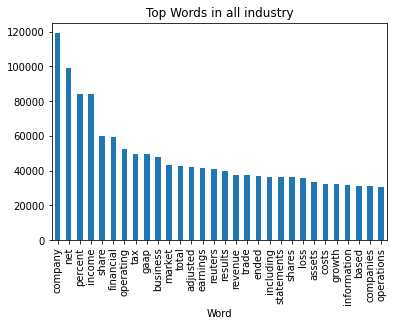

In [0]:
top_k_ngrams_industry('all', n=1, k=30)

top Words in Financials industry
          Word  count
0          net  61158
1      company  53678
2       income  52229
3      percent  49255
4    financial  37157
5        trade  33506
6        share  30665
7    operating  30251
8          tax  27800
9       market  26555
10       total  26453
11        gaap  26402
12    adjusted  26009
13        loss  24236
14    business  22738
15       ended  22687
16        bank  22045
17      assets  21806
18     results  21431
19    earnings  20630
20  statements  20148
21      shares  19842
22     revenue  19730
23     reuters  19568
24    interest  19483
25       costs  18660
26   including  17789
27      growth  17456
28     capital  17444
29       trump  17397


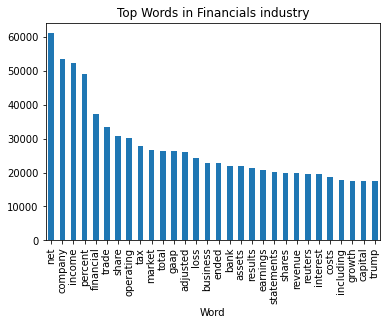

In [0]:
top_k_ngrams_industry('Financials', 1, k=30)

top Words in Information Technology industry
           Word  count
0       company  15186
1       percent  10745
2          gaap   9060
3           net   7962
4         share   7649
5      business   7043
6     financial   6684
7       revenue   6667
8        income   6562
9        shares   5947
10      reuters   5814
11    companies   5587
12   technology   5473
13     earnings   5461
14          tax   5311
15         data   5304
16       market   5123
17    operating   5089
18        based   4899
19   statements   4382
20    including   4283
21      results   4241
22  information   4198
23   securities   3979
24     offering   3913
25     services   3896
26         corp   3573
27       growth   3567
28         time   3550
29    investors   3475


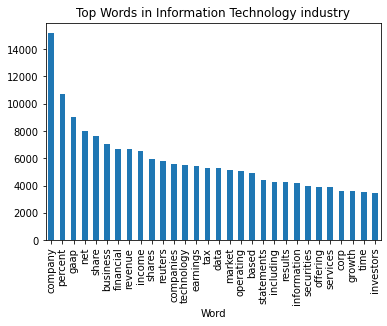

In [0]:
top_k_ngrams_industry('Information Technology', 1 , k=30)

####  4.2 Top Bigrams  by Industry

top Bigrams in all industry
                         Word  count
0                  net income  28206
1          forward statements  18847
2             adjusted ebitda  13513
3            operating income  11071
4              earnings share  11028
5              gaap financial  10337
6                 income loss   9652
7                income taxes   9506
8             chief executive   9336
9                  income tax   9221
10         financial measures   9073
11              press release   8199
12                   net loss   8189
13                 file photo   6973
14            president trump   6969
15  depreciation amortization   6461
16      continuing operations   6365
17       operating activities   6179
18          financial results   6141
19        risks uncertainties   6128


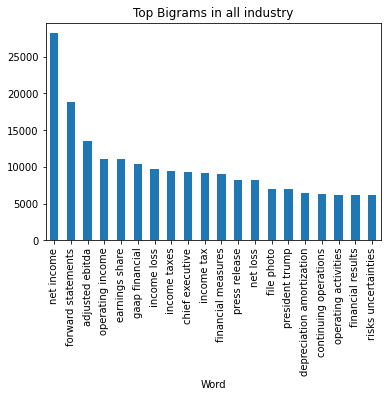

In [0]:
top_k_ngrams_industry('all', 2)

top Bigrams in Financials industry
                         Word  count
0                  net income  16873
1          forward statements   9998
2             adjusted ebitda   9303
3            operating income   6685
4                 income loss   6450
5              gaap financial   5842
6                income taxes   5697
7                  income tax   5624
8                    net loss   5499
9          financial measures   5245
10            president trump   4947
11             earnings share   4832
12              press release   4521
13               central bank   4147
14  depreciation amortization   4129
15       operating activities   3932
16               adjusted net   3853
17            chief executive   3796
18             current assets   3775
19            federal reserve   3754


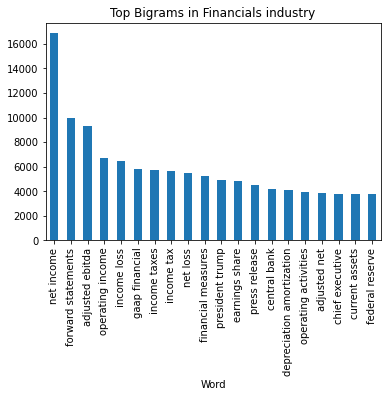

In [0]:
top_k_ngrams_industry('Financials',2)

top Bigrams in Information Technology industry
                   Word  count
0            net income   2534
1    forward statements   2403
2        earnings share   1529
3        gaap financial   1456
4         press release   1385
5       chief executive   1317
6    financial measures   1293
7    based compensation   1216
8              gaap net   1166
9            file photo   1162
10          cents share    931
11  securities exchange    913
12     operating income    907
13      public offering    894
14     earnings release    861
15       gaap operating    813
16           income tax    800
17         income taxes    795
18  exchange commission    790
19  risks uncertainties    786


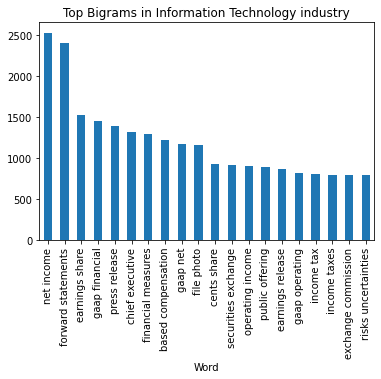

In [0]:
top_k_ngrams_industry('Information Technology',2)

After experiments, top trigrams and quatgrams can contain some noise phrases, so we think bigrams could give us the most information.

#### 4.3 Top Bi-grams by Positive/Negative Sentiment

In [0]:
def top_k_ngrams_sentiment(label, n=1, k=20):
    sdict = {'positive':1.0, 'neutral':0.0, 'negative':-1.0}
    sub_df = labeled_data.loc[labeled_data['label']==sdict[label]]
    text = ''.join(sub_df.text_no_stopwords)
    common_words = top_k_ngrams(text, n, k)
    df = pd.DataFrame(common_words, columns=['Word','count'])
    df['Word'] = df.Word.apply(lambda x:' '.join(x))
    
    if n==1:
        gram_name = 'Words'
    elif n==2:
        gram_name = 'Bigrams'
    elif n==3:
        gram_name = 'Trigrams'
    elif n==4:
        gram_name = 'Quatgrams'
    else:
        gram_name = f'{n}grams'
    
    print(f'top {gram_name} in {label} news')
    print(df)
    return df
#     df.groupby('Word').sum()['count'].sort_values(ascending=False).plot(kind='bar', title=f'Top {gram_name} in {label} news')

In [0]:
positive_top_bigrams = top_k_ngrams_sentiment('positive', 2)

top Bigrams in positive news
                  Word  count
0      chief executive    103
1       earnings share     71
2   forward statements     66
3           file photo     55
4    executive officer     52
5        reuters staff     50
6      percent percent     47
7          cents share     47
8    bengaluru editing     39
9           oil prices     38
10         minutes ago     38
11     president trump     37
12     today announced     37
13        told reuters     37
14         source text     37
15       business wire     36
16      points percent     36
17       news releases     34
18         html source     34
19    original content     33


In [0]:
negative_top_bigrams = top_k_ngrams_sentiment('negative', 2)

top Bigrams in negative news
                    Word  count
0        president trump     68
1             file photo     65
2              trade war     53
3        chief executive     47
4   additional reporting     45
5           told reuters     34
6            minutes ago     32
7          reuters staff     32
8              hours ago     30
9       declined comment     29
10            oil prices     28
11        shares percent     27
12          central bank     26
13        prime minister     25
14       percent percent     23
15         staff reuters     23
16       updated minutes     22
17       trade agreement     21
18        interest rates     20
19           world trade     19


In [0]:
noise_words = set(['file photo','percent percent','bengaluru editing','minutes ago','hours ago','source text','points percent','html source','reuters staff','told reuters','staff reuters','updated minutes'])

In [0]:
common_words = set(positive_top_bigrams.Word).intersection(set(negative_top_bigrams.Word))
print(f'Common top words in +/- news: \n{common_words-noise_words}')

Common top words in +/- news: 
{'chief executive', 'oil prices', 'president trump'}


Words that mentioned most in both + & - news are __CEO, President, Oil price__. This makes perfect sense as company CEOs usually mentioned with company plans/actions/performance, President is often associated with government policies/actions, and oil price is an important and basic indicator in marco economy performance. Company performance, governement policy and oil price are indeed main factors that could effect and reflect the market stock price.

In [0]:
print('Top words in + news after removing noise:')
set(positive_top_bigrams.Word)-noise_words

Top words in + news after removing noise:


{'business wire',
 'cents share',
 'chief executive',
 'earnings share',
 'executive officer',
 'forward statements',
 'news releases',
 'oil prices',
 'original content',
 'president trump',
 'today announced'}

According to the result, company __earning share__, __forward statements__, __new relases__(of product) and (creating) __original content__ have positive effects on a company.

In [0]:
print('Top words in - news after removing noise:')
set(negative_top_bigrams.Word)-noise_words

Top words in - news after removing noise:


{'additional reporting',
 'central bank',
 'chief executive',
 'declined comment',
 'interest rates',
 'oil prices',
 'president trump',
 'prime minister',
 'shares percent',
 'trade agreement',
 'trade war',
 'world trade'}

According to the result, news related to __declined comment__, __trade war__ and __president trump__ have positive effects on a company.

In [0]:
print('Top 10 bigrams in +/- News')
pd.DataFrame({'Positive News':['chief executive','earnings share','forward statements','cents share','business wire',
 'oil prices','president trump', 'today announced', 'news releases',
 'original content'], 'Negative News':['president trump','trade war','chief executive','additional reporting','declined comment', 'oil prices',
 'shares percent','central bank','prime minister','trade agreement']})

Top 10 bigrams in +/- News


,Positive News,Negative News
0,chief executive,president trump
1,earnings share,trade war
2,forward statements,chief executive
3,cents share,additional reporting
4,business wire,declined comment
5,oil prices,oil prices
6,president trump,shares percent
7,today announced,central bank
8,news releases,prime minister
9,original content,trade agreement
